### Student Information
Name: 白睿思 Aramis Alberto Palacios Aguirre

Student ID: 114065422

GitHub ID: AramisPalacios

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Data Source

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import sys
import helpers.data_mining_helpers as dmh
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print(df.shape)
df.head(2)

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


### 2. Data Preparation

In [4]:
# Excersise 1

for i in range(3):
    print(f"SAMPLE {i+1}\n")
    print(df.text[i])
    print("\n")

SAMPLE 1

Calls on retards


SAMPLE 2

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


SAMPLE 3

Seeing lots of red in the ticker.




In [5]:
# In this case, we will use the whole dataset

### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas dataframe

In [6]:
# Not necessary, because I used read_csv() function from pandas

#### 3.2 Familiarizing yourself with the Data

In [7]:
# Excersise 2

# Querying the first and last columns where the 'type' is not 'comment'

df[df.columns[[0,-1]]][df['type'] != 'comment']

,type,label
3,post,1.0
48,post,0.0
63,post,0.0
70,post,0.0
72,post,0.0
...,...,...
783,post,0.0
786,post,0.0
802,post,0.0
836,post,0.0


In [8]:
# Excesise 3

df[df['sentiment'] == 0].loc[::10, :].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.0,['ticker'],0.0
24,comment,2025-04-11 11:37:41,mmjohl7,stocks,BREAKING: China raises tariffs on U.S. goods t...,applecokecake,https://www.reddit.com/r/stocks/comments/1jwku...,1,NaN,NaN,Shop like a billionaire.,0.0,0.0,0.0,"['billionaire', 'Shop']",0.0
50,comment,2021-07-29 14:27:50,h6yk0ll,stockstobuytoday,Technical Analysis Thread.,MayorOfDanktown,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,"Yup - money, money",0.0,0.0,0.0,['money'],0.0
81,comment,2025-04-11 17:19:41,mmlg1y2,wallstreetbets,Retardation is on the menu boys! WSB is so back,ManyCommunications,https://i.redd.it/0yq2ftren8ue1.jpeg,6,NaN,NaN,The cost of this was SPY going -20%. I’ll take...,0.0,0.0,0.0,"['cost', '%', 'emote|t5_2th52|8882', 'SPY', ']']",1.0
107,comment,2022-01-03 20:44:34,hr4chzn,stockstobuytoday,$GNPX stock of the day,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,![gif](giphy|3oz8xZGfHArTvh99YI),0.0,0.0,0.0,"[']', 'gif', 'giphy|3oz8xZGfHArTvh99YI', '[']",0.0


### 4. Data Mining using Pandas

#### 4.1 Dealing with Missing Values

In [9]:
# Checking the missing values per column

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [10]:
# Excersise 4

# Checking the missing values per row

df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [11]:
# Excercise 5

# Not necessary, since it's a demostrative excercise for the "Master" notebook

#### Action

In [12]:
df.downvotes.unique()

array([nan,  0.,  4., 11.,  1.])

In [13]:
df.upvote_ratio.unique()

array([ nan, 0.98, 1.  , 0.95, 0.92, 0.91, 0.99, 0.93, 0.5 , 0.84])

In [14]:
df[~df.upvote_ratio.isnull()]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,post,2025-03-31 13:54:38,1jo3qsz,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
786,post,2025-04-03 12:30:39,1jqh5xb,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
802,post,2025-04-02 13:54:36,1jpp50o,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
836,post,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


In [15]:
# Given that we have two columns with missing values ("downvotes" and "upvote_ratio"), one would think to drop the missing values. 
# However, since the column "upvotes" has no missing values and those 3 columns are related, we can fill the missing values of "downvotes" 
# with 0 (assuming a null value is equal to 0 for the "downvotes" field), as well as fill the missing values of "upvote_ratio" with a 
# formula ("upvotes" / ("upvotes" + "downvotes")). This might be useful for visualizations in the future.

In [16]:
df = df.fillna({'downvotes': 0})
df['upvote_ratio'] = np.where((df['upvotes'] + df['downvotes']) == 0, 0, df['upvotes'] / (df['upvotes'] + df['downvotes']))
df.head(2)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,0.0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.0,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


In [17]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.2 Dealing with Duplicate Data

In [18]:
# Not excersises in this section

In [19]:
# We don't have duplicated rows

df[df.duplicated()]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label


### 5. Data Preprocessing

#### 5.1 Sampling

In [20]:
# Excersise 6

# Changes noticed:
# 1. df_sample is a random sample of 100 rows taken from the original dataframe df, so it has less rows as the original.
# 2. The sample is taken randomly, so the records in df_sample are not necessarily the first 100 records of X.
# 3. The indexes of the rows in df_sample are also different from those in X, since they are taken randomly and have not been reset.

df_sample = df.sample(n=300)

print(df.head()[["text", "sentiment"]])
print('-----')
print(df_sample.head()[["text", "sentiment"]])

                                                text  sentiment
0                                   Calls on retards       -1.0
1  Stunt as in like why did they even make a big ...        1.0
2                  Seeing lots of red in the ticker.        0.0
3  Vision Marine Technologies Inc. is rewriting t...        1.0
4                           He didn’t say thank you.        0.0
-----
                                                  text  sentiment
675  Too bad I won't be going to Orlando this year ...       -1.0
737  Vix 7% up even with SPY up\r\n\r\nA storms a b...        0.0
554  Selling my Silver, pity it's just a miniscule ...       -1.0
220  I'm employed doing well with no debt but there...        1.0
770  Literally spent my last dollar on puts. A 12 h...        1.0


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

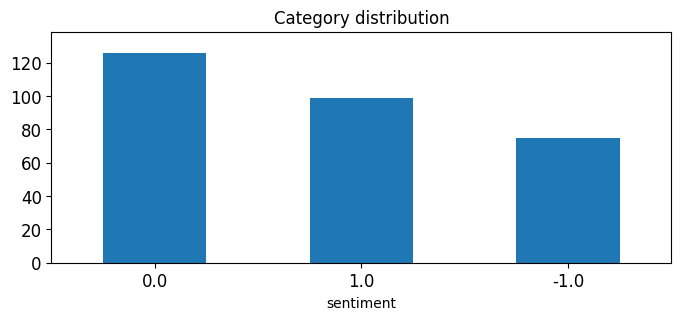

In [21]:
# Excersise 7

df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, df_sample.value_counts('sentiment').max() * 1.10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Sentiment distribution'}>

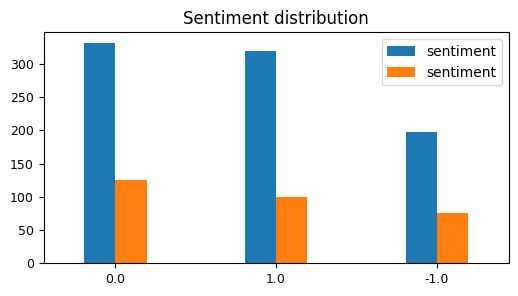

In [22]:
# Excersise 8

# Here's a similar distribution comparisson between the original dataset df and the sample df_sample

value_counts_df = df.value_counts('sentiment')
value_counts_df_sample = df_sample.value_counts('sentiment')

counts = pd.concat([value_counts_df, value_counts_df_sample], axis=1)
counts.columns = ['sentiment', 'sentiment']
counts.plot(
    kind='bar', 
    title='Sentiment distribution',
    rot=0, 
    fontsize=9,
    width=0.39,
    figsize=(6,3),
    xlabel='')

In [23]:
# As we can infer, not all columns in the dataset are useful for text mining purposes. For example, "post_id", "author" and "url" so we'll get rid of them. 
# In this case, it may not be necessary because the dataset is not too big, but in larger datasets it would be a good practice to drop useless columns.

In [24]:
df = df.drop(columns=['post_id', 'author', 'url'])

#### 5.2 Feature Creation

In [25]:
# No excersise in this section

In [26]:
# Tokenizing text data

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

#### 5.3 Feature Subset Selection

In [27]:
# Excersise 9

# Note that I'm adding the stop_words='english' and lowercase=True arguments in order to get a cleaner tokenization with no stopwords and with no case sensitivity.

count_vect = CountVectorizer(stop_words='english', lowercase=True)
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(646))	1
  (np.int32(0), np.int32(3087))	1


In [28]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['craving', 'hawaiian', 'pizza', 'right']

In [29]:
analyze(df['text'][0])

['calls', 'retards']

In [30]:
df_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [31]:
# Excersise 10

# As we can see above, the term-document matrix is huge and sparse and we only have a few cases where they show different values than 0. I'll do the excersise based on the 4th record.
# The fourth record has 4 non-zero values.

fourth_record = df_counts[3, :200].toarray()
print(count_vect.get_feature_names_out()[[i for i in range(len(fourth_record[0])) if fourth_record[0][i] > 0]])

['116' 'achieved' 'achievement' 'achieves']


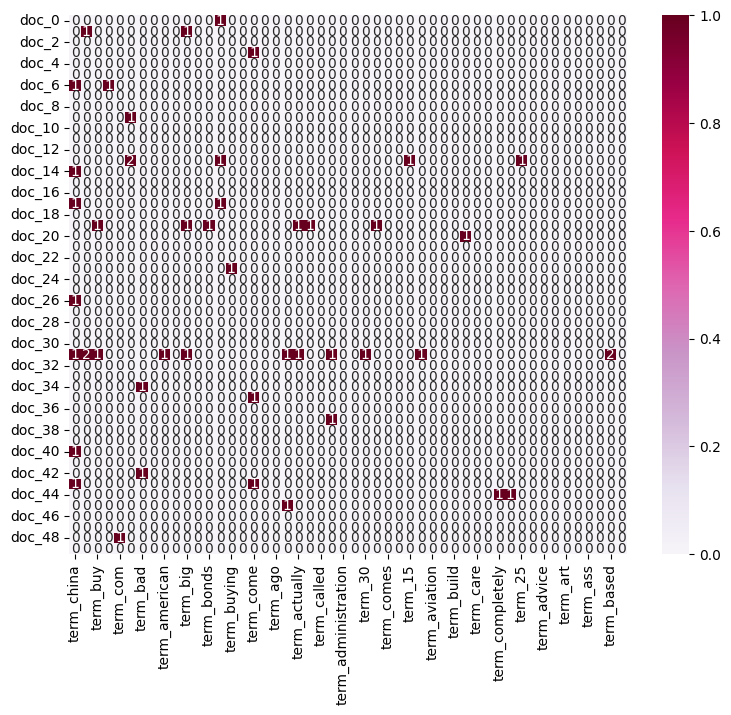

In [32]:
# Excersise 11

# To achieve a better visualization, we first calculate the term frequencies by summing up the columns of the document-term matrix df_counts.
# Then we sort the terms based on their frequencies and select the top N most frequent terms (user can vary the N most frequent terms).
# Finally, we create a heatmap using these top N terms across the first M documents.
# With this we can see the distribution of the most common terms across multiple documents with the heatmap showing more color on the left.
# We can also see that the most common term across all documents is "china"

n_terms = 50
m_documents = 50

term_freq = list(zip(range(df_counts.shape[0]), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[1], reverse=True)
top_n_terms = [t[0] for t in sorted_term_freq[:n_terms]]

plot_x = ['term_' + count_vect.get_feature_names_out()[i] for i in top_n_terms]
plot_y = ["doc_" + str(i) for i in list(df.index)[:m_documents]]
plot_z = df_counts[:m_documents, top_n_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 5.4 Atrribute Transformation / Aggregation

##### 5.4.1 Transform Text Data

In [33]:
# Excersise 12

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
df_terms = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:300],
    "Frequency": term_frequencies[:300]
})

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"First 300 Term Frequencies (by alphabetical order)",)
fig.update_layout(xaxis=dict(tickangle=-90))
fig.show()

In [34]:
# Excersise 13

# In this case, we just add a variable to set the number of terms to visualize. It's more efficient because you only need to change
# one variable.

import plotly.express as px

n_terms = 50

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
df_terms = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:n_terms],
    "Frequency": term_frequencies[:n_terms]
})

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"First {n_terms} Term Frequencies (by alphabetical order)")
fig.update_layout(xaxis=dict(tickangle=-90))
fig.show()

In [35]:
# Excersise 14

# In this case, we use previously created code to sort the terms efficiently. Since the sorting has been optimized, it's
# only necessary to change the top_n_terms variable

term_freq = list(zip(range(df_counts.shape[0]), count_vect.get_feature_names_out(), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[2], reverse=True)

top_n_terms = 50

df_terms = pd.DataFrame(sorted_term_freq[:top_n_terms], columns=['Index', 'Term', 'Frequency'])

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"Top {top_n_terms} Most Frequent Terms",
    hover_data=["Index"],
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [36]:
# Excersise 15

# In this case, we use the code from the previous excersise, but we apply a logarithmic scale to the frequencies.
# When we use regular term frequency to plot, we can see that the first few terms have a very high frequency compared to the rest
# and tend to dominate the graph. This doesn't happen when we change to log distribution.
# The change in the Y-axis and the curvature of the distribution also indicates that now the plot highlights those words with
# medium-frequency, which can be more meaningful than those with very high frequency. Given a large vocabulary, those
# medium-frequency words can provide more insights into the text data.

term_freq = list(zip(range(df_counts.shape[0]), count_vect.get_feature_names_out(), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[2], reverse=True)
sorted_term_freq = [(i[0], i[1], math.log(i[2])) for i in sorted_term_freq]

top_n_terms = 300

df_terms = pd.DataFrame(sorted_term_freq[:top_n_terms], columns=['Index', 'Term', 'Frequency'])

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"Top {top_n_terms} Most Frequent Terms",
    hover_data=["Index"],
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

### 6. Generating meaningful visualizations

In [37]:
# 1. Sentiment distribution by Subreddit. In this plot, I use a box diagram to show to what sentiment is most inclined each subreddit.

# In this case, "wallstreetbets" and "stockstobuytoday" are more inclined to a positive sentiment.
# However, with a bigger dataset, we might see a better look on the inclinations for each subreddit, since the distribution is irregular.

print(df.value_counts('subreddit'))

fig = px.box(df, x="subreddit", y="sentiment",
             title="Sentiment Distribution by Subreddit",
             points="all")
fig.show()

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


In [38]:
# 2. Quarterly Average Sentiment Over Time. In this plot, I use a line diagram to show the evolution of sentiment in all subreddits over 
# time.

# In this case, we can se that between 2023 and 2024, the sentiment was mostly positive, declining entirely entering 2025.

df["datetime"] = pd.to_datetime(df["datetime"])
time_sentiment = df.groupby(pd.Grouper(key="datetime", freq="QE"))["sentiment"].mean().reset_index()

fig = px.line(time_sentiment, x="datetime", y="sentiment",
              title="Quarterly Average Sentiment Over Time")
fig.show()

In [39]:
# 3. Top Frequent Terms by Sentiment (log frequency). In this plot, I use a bar diagram to showcase the most frequent terms by sentiment,
# using a logarithmic scale for the frequencies to better visualize the medium-frequency terms.

# I use previously created code to get the term frequencies, but I separate them by sentiment (positive, neutral and negative).

# Positive sentiment
vect_pos = CountVectorizer(stop_words="english", lowercase=True)
counts_pos = vect_pos.fit_transform(df[df["sentiment"] > 0]["text"])

term_freq_pos = list(zip(vect_pos.get_feature_names_out(), counts_pos.toarray().sum(axis=0).tolist()))
sorted_term_freq_pos = sorted(term_freq_pos, key=lambda x: x[1], reverse=True)
sorted_term_freq_pos = [(term, math.log(freq)) for term, freq in sorted_term_freq_pos if freq > 0]

df_terms_pos = pd.DataFrame(sorted_term_freq_pos[:20], columns=["Term", "Frequency"])
df_terms_pos["Sentiment"] = "Positive"

# Neutral Sentiment
vect_neu = CountVectorizer(stop_words="english", lowercase=True)
counts_neu = vect_neu.fit_transform(df[df["sentiment"] == 0]["text"])

term_freq_neu = list(zip(vect_neu.get_feature_names_out(), counts_neu.toarray().sum(axis=0).tolist()))
sorted_term_freq_neu = sorted(term_freq_neu, key=lambda x: x[1], reverse=True)
sorted_term_freq_neu = [(term, math.log(freq)) for term, freq in sorted_term_freq_neu if freq > 0]

df_terms_neu = pd.DataFrame(sorted_term_freq_neu[:20], columns=["Term", "Frequency"])
df_terms_neu["Sentiment"] = "Neutral"

# Negative sentiment
vect_neg = CountVectorizer(stop_words="english", lowercase=True)
counts_neg = vect_neg.fit_transform(df[df["sentiment"] < 0]["text"])

term_freq_neg = list(zip(vect_neg.get_feature_names_out(), counts_neg.toarray().sum(axis=0).tolist()))
sorted_term_freq_neg = sorted(term_freq_neg, key=lambda x: x[1], reverse=True)
sorted_term_freq_neg = [(term, math.log(freq)) for term, freq in sorted_term_freq_neg if freq > 0]

df_terms_neg = pd.DataFrame(sorted_term_freq_neg[:20], columns=["Term", "Frequency"])
df_terms_neg["Sentiment"] = "Negative"

# --- Combine all ---
df_terms = pd.concat([df_terms_pos, df_terms_neu, df_terms_neg])

fig = px.bar(df_terms, x="Term", y="Frequency", color="Sentiment",
             barmode="group",
             title="Top Frequent Terms by Sentiment (log frequency)")
fig.update_layout(xaxis_tickangle=-90)
fig.show()


# Phase 2

### 5.4.2 Frequent Pattern Mining

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])
    print(filt_term_document_dfs[category].shape)

(315, 2228)
(423, 2784)
(109, 1186)


In [ ]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])



For category -1.0 we filter the following words:
Bottom 1.0% words: 
1974           1
13â            1
13             1
10000          1
1000           1
selloff        1
self           1
42             1
401k           1
40             1
350            1
31             1
operational    1
operate        1
open           1
onto           1
4th            1
17th           1
160            1
16             1
150            1
14th           1
dtype: int64
Top 5.0% words: 
shit       11
bad        11
dollar     11
after      11
iâ         11
         ... 
of        130
is        178
and       193
to        231
the       409
Length: 111, dtype: int64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
17th             1
18               1
186              1
18630            1
1870             1
1k               1
1m               1
118              1
1242             1
opinion          1
opportunities    1
opportunity      1
opposed          1
options          1
officer    

In [ ]:
# Exercise 16

# Answer here

# Similarities
# All three sentiment categories, negative (-1.0), neutral (0.0), and positive (1.0), share many common top words like “the”, “and”, “to”, “is”, and “it”. These are very frequent words that don’t add real meaning to 
# the text. In general, the top words are too common to help us see clear differences between positive, neutral, or negative texts, but there might be some exceptions like "good" in the positive category.
 
# Differences
# The bottom 1.0% words seem mostly like noise, random numbers or words that don't add any meaning by themselves. For example, in category 0.0 (neutral), the rare words include “yahoo”, “yall”, and many numbers like “2028”, 
# “100k”, and “10k”, which could point to more casual or online discussions but don't really tells us much. However, the lenght of the list of bottom and top words vary from category to category, indicating that some 
# categories have more unique or rare words than others. This might affect the analysis if we have a skewed distribution of words in different categories. 

In [ ]:
# Creating transactional databases for each category and replacing the "-" from "-1.0" with "minus_1_0" to avoid errors in file creation

from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = str(category).replace('.', '_').replace('-', 'minus_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [ ]:
# Override the built-in open function to handle CSV files with Latin-1 encoding and ignore errors

import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [ ]:
# Implementing FPGrowth for category 1.0 (positive sentiment)

# Note that I'm adding a lower minSup value 6 to get more patterns for analysis, since this dataset is smaller than the one for the Master notebook.

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_1_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', frequentPatternsDF_1_0['Support'].min())
print('Max Support:', frequentPatternsDF_1_0['Support'].max())
obj1.save('freq_patterns_1_0_minSup6.txt')
frequentPatternsDF_1_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 8
Runtime: 0.01987314224243164
Min Support: 6
Max Support: 6


,Patterns,Support
0,into,6
1,your,6
2,us,6
3,them,6
4,itâ,6
5,out,6
6,economy,6
7,way,6


In [ ]:
# Implementing FPGrowth for category 0.0 (neutral sentiment)

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_0_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_0_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_0_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', frequentPatternsDF_0_0['Support'].min())
print('Max Support:', frequentPatternsDF_0_0['Support'].max())
obj1.save('freq_patterns_0_0_minSup6.txt')
frequentPatternsDF_0_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 98
Runtime: 0.01714301109313965
Min Support: 6
Max Support: 10


,Patterns,Support
0,big,6
1,deal,6
2,talk,6
3,months,6
4,probably,6
...,...,...
93,down,10
94,most,10
95,go,10
96,well,10


In [ ]:
# Implementing FPGrowth for category -1.0 (negative sentiment)

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_minus_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_minus_1_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_minus_1_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', frequentPatternsDF_minus_1_0['Support'].min())
print('Max Support:', frequentPatternsDF_minus_1_0['Support'].max())
obj1.save('freq_patterns_minus_1_0_minSup6.txt')
frequentPatternsDF_minus_1_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 106
Runtime: 0.0030744075775146484
Min Support: 6
Max Support: 10


,Patterns,Support
0,calls,6
1,companies,6
2,lot,6
3,next,6
4,first,6
...,...,...
101,things,10
102,here,10
103,these,10
104,sure,10


In [ ]:
# Exercise 17

# In this case, I'll use the category "-1.0" (negative sentiment) as reference, since is the one with the most number of patterns.

# The baseline algorithm (FPGrowth with minSup=6) shows a total of 106 patterns in 0.003 seconds, with supports ranging from 6 to 10 and patterns of only 1 item.

In [ ]:
# FAE Top-K algorithm with k value of 500 for category -1.0 (negative sentiment)

from PAMI.frequentPattern.topk import FAE  as alg

inputFile = 'td_freq_db_minus_1_0.csv'
kCount=500
seperator='\t'
obj_fae_500 = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)
obj_fae_500.mine()
frequentPatterns_fae_500_minus_1_0 = obj_fae_500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns_fae_500_minus_1_0)))
print('Runtime: ' + str(obj_fae_500.getRuntime()))
print('Min Support:', frequentPatterns_fae_500_minus_1_0['Support'].min())
print('Max Support:', frequentPatterns_fae_500_minus_1_0['Support'].max())
obj_fae_500.save('frequentPatterns_fae_500_minus_1_0.txt')
frequentPatterns_fae_500_minus_1_0

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.10895538330078125
Min Support: 2
Max Support: 10


,Patterns,Support
0,things,10
1,here,10
2,these,10
3,sure,10
4,again,10
...,...,...
495,disaster,2
496,house,2
497,republican,2
498,unexpected,2


In [ ]:
# The FAE Top-K algorithm with k=500 shows a total of 500 patterns in 0.11 seconds. The supports range from 2 to 10, and patterns of length up to 2.
# However, the runtime is 36.7x longer than the baseline and the amount of patterns is significantly higher due to the k value limit. This might be useful when working with small
# datasets.

In [ ]:
# # FAE Top-K algorithm with k value of 1000 for category -1.0 (negative sentiment)

# from PAMI.frequentPattern.topk import FAE  as alg

# kCount=1000
# seperator='\t'
# obj_fae_1000 = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)
# obj_fae_1000.mine()
# frequentPatterns_fae_1000_minus_1_0 = obj_fae_1000.getPatternsAsDataFrame()
# print('Total No of patterns: ' + str(len(frequentPatterns_fae_1000_minus_1_0)))
# print('Runtime: ' + str(obj_fae_1000.getRuntime()))
# print('Min Support:', frequentPatterns_fae_1000_minus_1_0['Support'].min())
# print('Max Support:', frequentPatterns_fae_1000_minus_1_0['Support'].max())
# obj_fae_1000.save('frequentPatterns_fae_1000_minus_1_0.txt')
# frequentPatterns_fae_1000_minus_1_0

KeyboardInterrupt: 

In [ ]:
# The FAE Top-K algorithm with k=1000 couldn't run. Takes too much time and memory to complete.

In [ ]:
# # FAE Top-K algorithm with k value of 1500 for category -1.0 (negative sentiment)

# kCount=1500
# seperator='\t'
# obj_fae_1500 = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)
# obj_fae_1500.mine()
# frequentPatterns_fae_1500_minus_1_0 = obj_fae_1500.getPatternsAsDataFrame()
# print('Total No of patterns: ' + str(len(frequentPatterns_fae_1500_minus_1_0)))
# print('Runtime: ' + str(obj_fae_1500.getRuntime()))
# print('Min Support:', frequentPatterns_fae_1500_minus_1_0['Support'].min())
# print('Max Support:', frequentPatterns_fae_1500_minus_1_0['Support'].max())
# obj_fae_1500.save('frequentPatterns_fae_1500_minus_1_0.txt')
# frequentPatterns_fae_1500_minus_1_0

KeyboardInterrupt: 

In [ ]:
# The FAE Top-K algorithm with k=1500 couldn't run. Takes too much time and memory to complete.

In [ ]:
# MaxFPGrowth algorithm with minSup = 3 for category -1.0 (negative sentiment)

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

minSup=3
obj_mfpg_3 = alg.MaxFPGrowth(iFile=inputFile, minSup=minSup, sep='\t')
obj_mfpg_3.mine()
frequentPatterns_mfpg_3_minus_1_0 = obj_mfpg_3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns_mfpg_3_minus_1_0)))
print('Runtime: ' + str(obj_mfpg_3.getRuntime()))
print('Min Support:', frequentPatterns_mfpg_3_minus_1_0['Support'].min())
print('Max Support:', frequentPatterns_mfpg_3_minus_1_0['Support'].max())
obj_mfpg_3.save('frequentPatterns_mfpg_3_minus_1_0.txt')
frequentPatterns_mfpg_3_minus_1_0

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 337
Runtime: 0.008810281753540039
Min Support: 3
Max Support: 10


,Patterns,Support
0,being,3
1,leader,3
2,remember,3
3,wonâ,3
4,fair,3
...,...,...
332,should,9
333,day,9
334,here right,3
335,end,9


In [ ]:
# The MaxFPGrowth algorithm with minSup = 3 shows a total of 337 patterns in 0.0088 seconds. The supports range from 3 to 10, and patterns can be of a length up to 3. 
# Moreover, the runtime is 4x longer than the baseline.

In [ ]:
# MaxFPGrowth algorithm with minSup = 6 for category -1.0 (negative sentiment)

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

minSup=6
obj_mfpg_6 = alg.MaxFPGrowth(iFile=inputFile, minSup=minSup, sep='\t')
obj_mfpg_6.mine()
frequentPatterns_mfpg_6_minus_1_0 = obj_mfpg_6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns_mfpg_6_minus_1_0)))
print('Runtime: ' + str(obj_mfpg_6.getRuntime()))
print('Min Support:', frequentPatterns_mfpg_6_minus_1_0['Support'].min())
print('Max Support:', frequentPatterns_mfpg_6_minus_1_0['Support'].max())
obj_mfpg_6.save('frequentPatterns_mfpg_6_minus_1_0.txt')
frequentPatterns_mfpg_6_minus_1_0

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 106
Runtime: 0.005850553512573242
Min Support: 6
Max Support: 10


,Patterns,Support
0,gonna,6
1,trading,6
2,lost,6
3,silver,6
4,don,6
...,...,...
101,again,10
102,sure,10
103,these,10
104,here,10


In [ ]:
# The MaxFPGrowth algorithm with minSup = 6 shows a total of 106 patterns in 0.006 seconds. The supports range from 6 to 10, and patterns are usually of a length
# of 1. Moreover, the runtime is 2x longer than the baseline.

In [ ]:
# MaxFPGrowth algorithm with minSup = 9 for category -1.0 (negative sentiment)

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

minSup=9
obj_mfpg_9 = alg.MaxFPGrowth(iFile=inputFile, minSup=minSup, sep='\t')
obj_mfpg_9.mine()
frequentPatterns_mfpg_9_minus_1_0 = obj_mfpg_9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns_mfpg_9_minus_1_0)))
print('Runtime: ' + str(obj_mfpg_9.getRuntime()))
print('Min Support:', frequentPatterns_mfpg_9_minus_1_0['Support'].min())
print('Max Support:', frequentPatterns_mfpg_9_minus_1_0['Support'].max())
obj_mfpg_9.save('frequentPatterns_mfpg_9_minus_1_0.txt')
frequentPatterns_mfpg_9_minus_1_0

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 20
Runtime: 0.002526998519897461
Min Support: 9
Max Support: 10


,Patterns,Support
0,great,9
1,donâ,9
2,into,9
3,week,9
4,well,9
5,america,9
6,last,9
7,same,9
8,want,9
9,should,9


In [ ]:
# The MaxFPGrowth algorithm with minSup = 9 shows a total of 20 patterns in 0.003 seconds. The supports range from 9 to 10, and patterns are of a length
# of 1. Moreover, the runtime is almost the same as the baseline.

In [ ]:
# Given all the experiments above, the MaxFPGrowth algorithm with minSup = 3 seems to be the most optimal for mining frequent patterns, since it returns a
# significantly larger amount of patterns compared to the baseline model (FPGrowth with minSup=9), which might be convenient for analysis since it returns patterns with larger lengths.

### 5.5 Dimensionality Reduction

In [ ]:
# Obtaining the final dataframe with the patterns that are unique to each category

import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_1_0, frequentPatternsDF_0_0, frequentPatternsDF_minus_1_0]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(d) for d in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

           Patterns  Support
81             most       10
80             down       10
167            sure       10
166            here       10
168           again       10
..              ...      ...
116            went        6
117  administration        6
118           every        6
119          though        6
120             don        6

[169 rows x 2 columns]
Number of patterns discarded: 43


In [ ]:
# Creating the augmented term-document matrix with the found patterns

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,puts,both,come,years,face,went,administration,every,though,don
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
print(X_pca_tdm.shape, X_tsne_tdm.shape, X_umap_tdm.shape)

(847, 2) (847, 2) (847, 2)


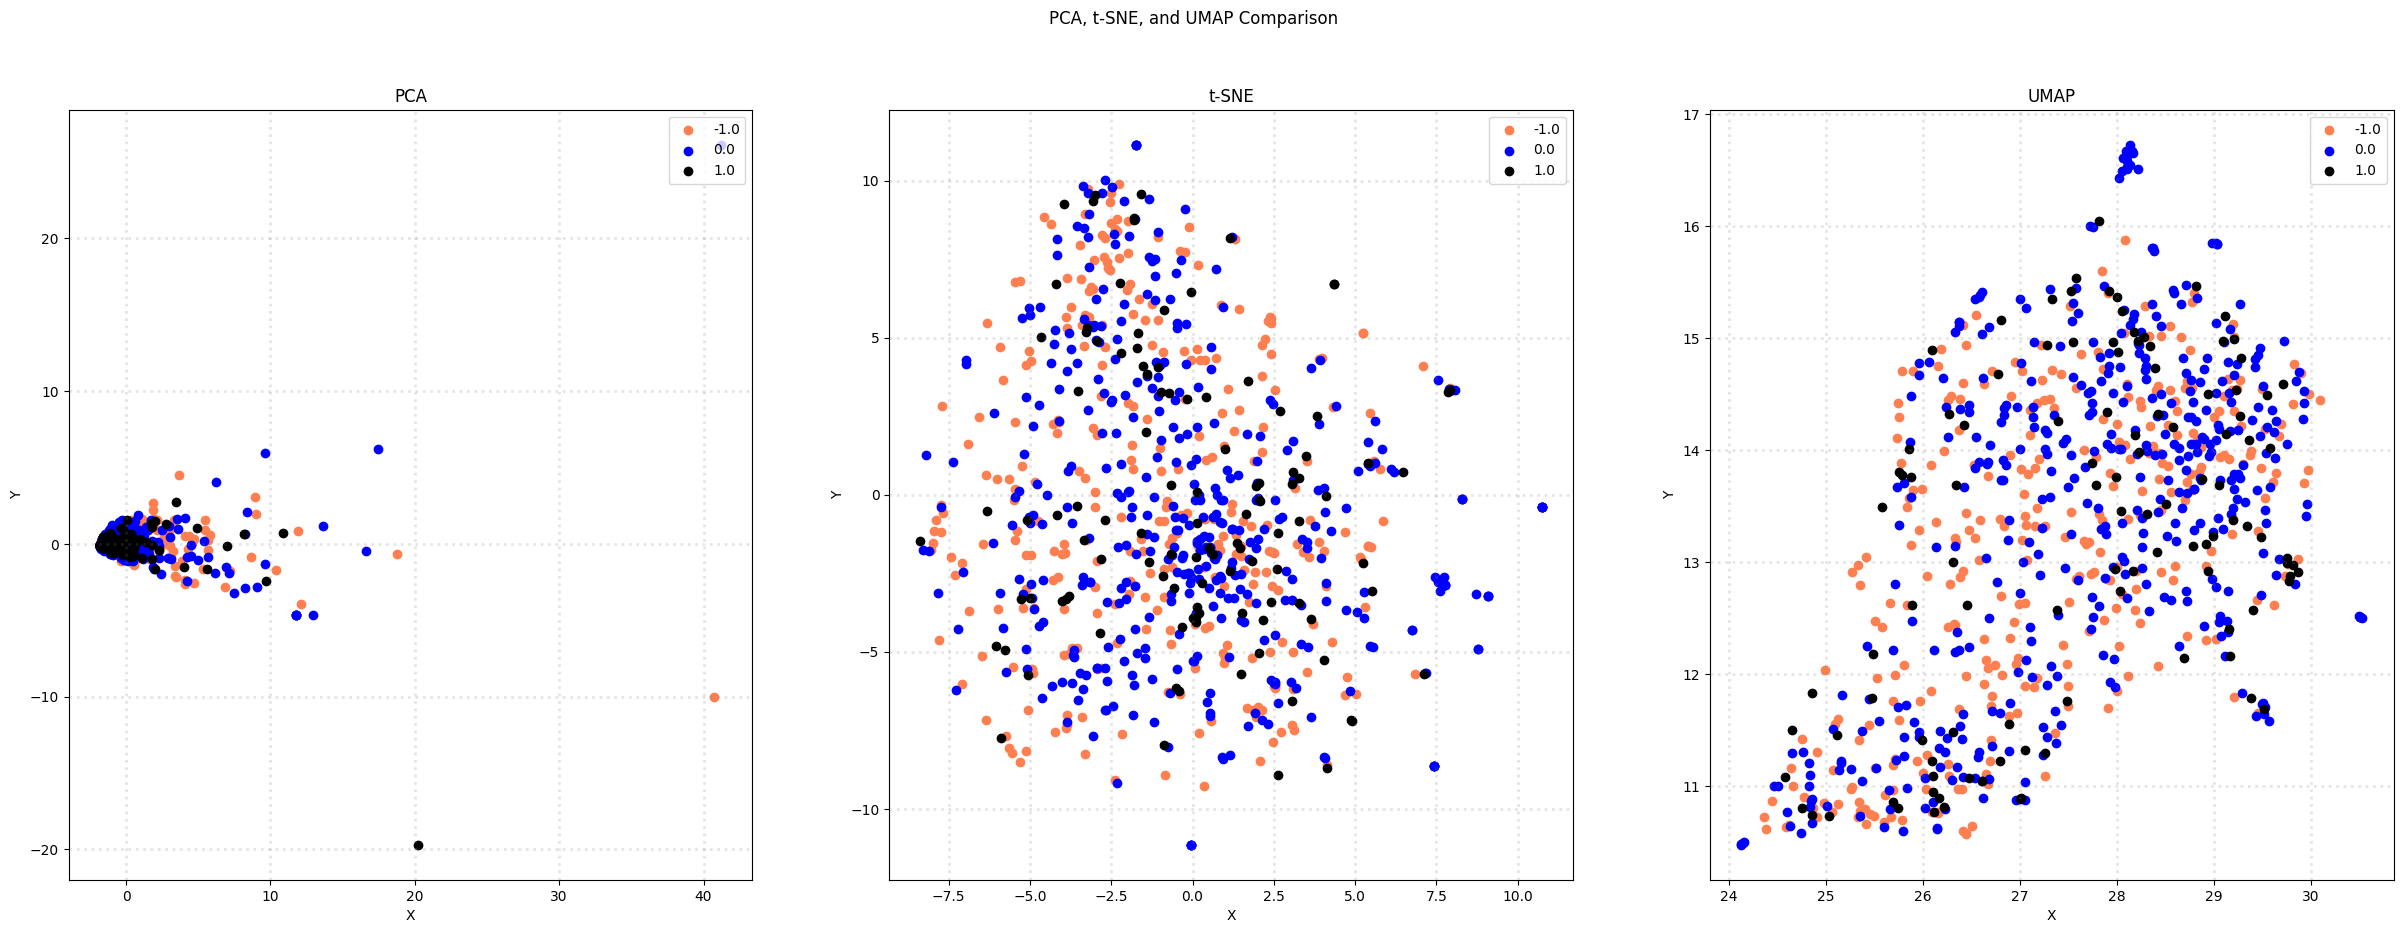

In [ ]:
# Plotting the results with 2 dimensions in the original term-document matrix

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['label'] == category].T[0]
        ys = X_reduced[df['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

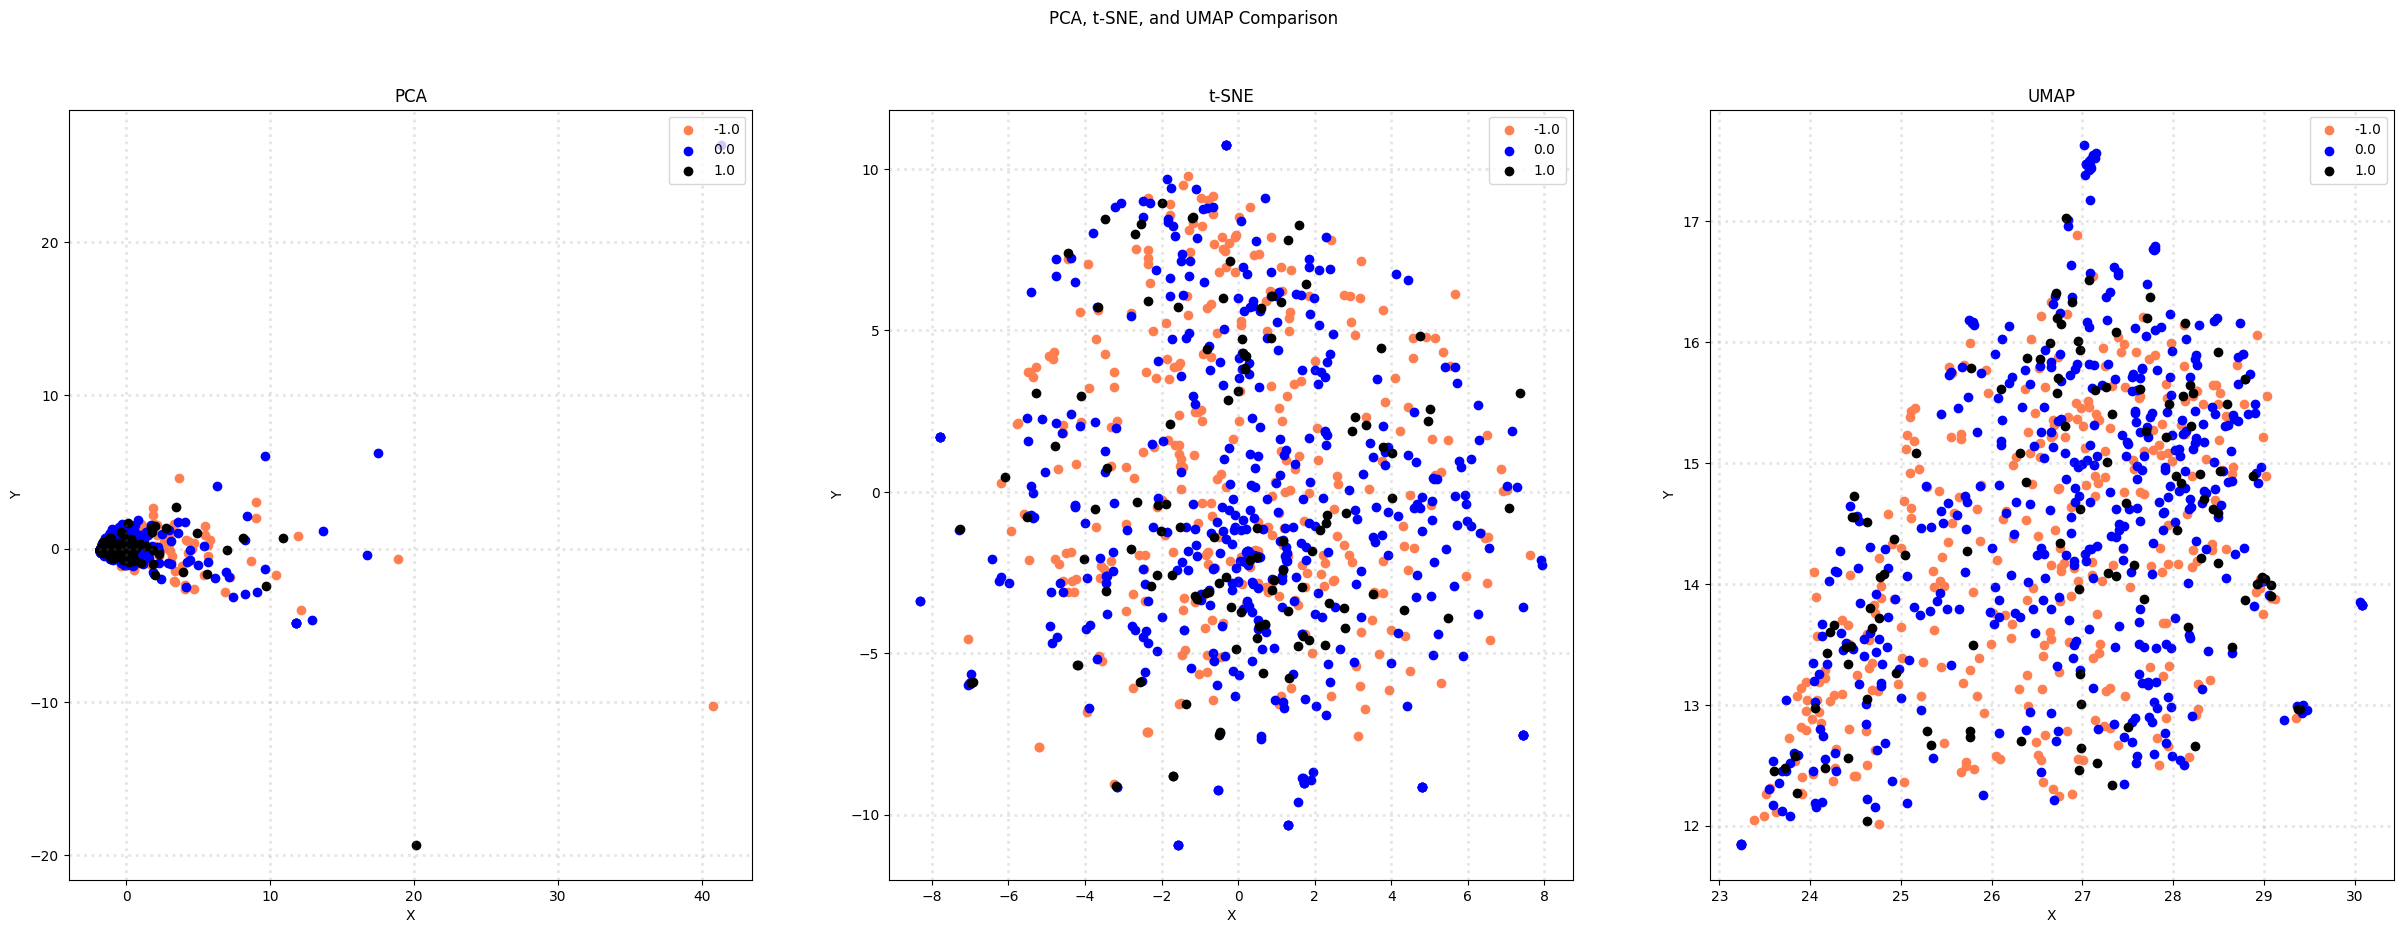

In [ ]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['label'] == category].T[0]
        ys = X_reduced[df['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

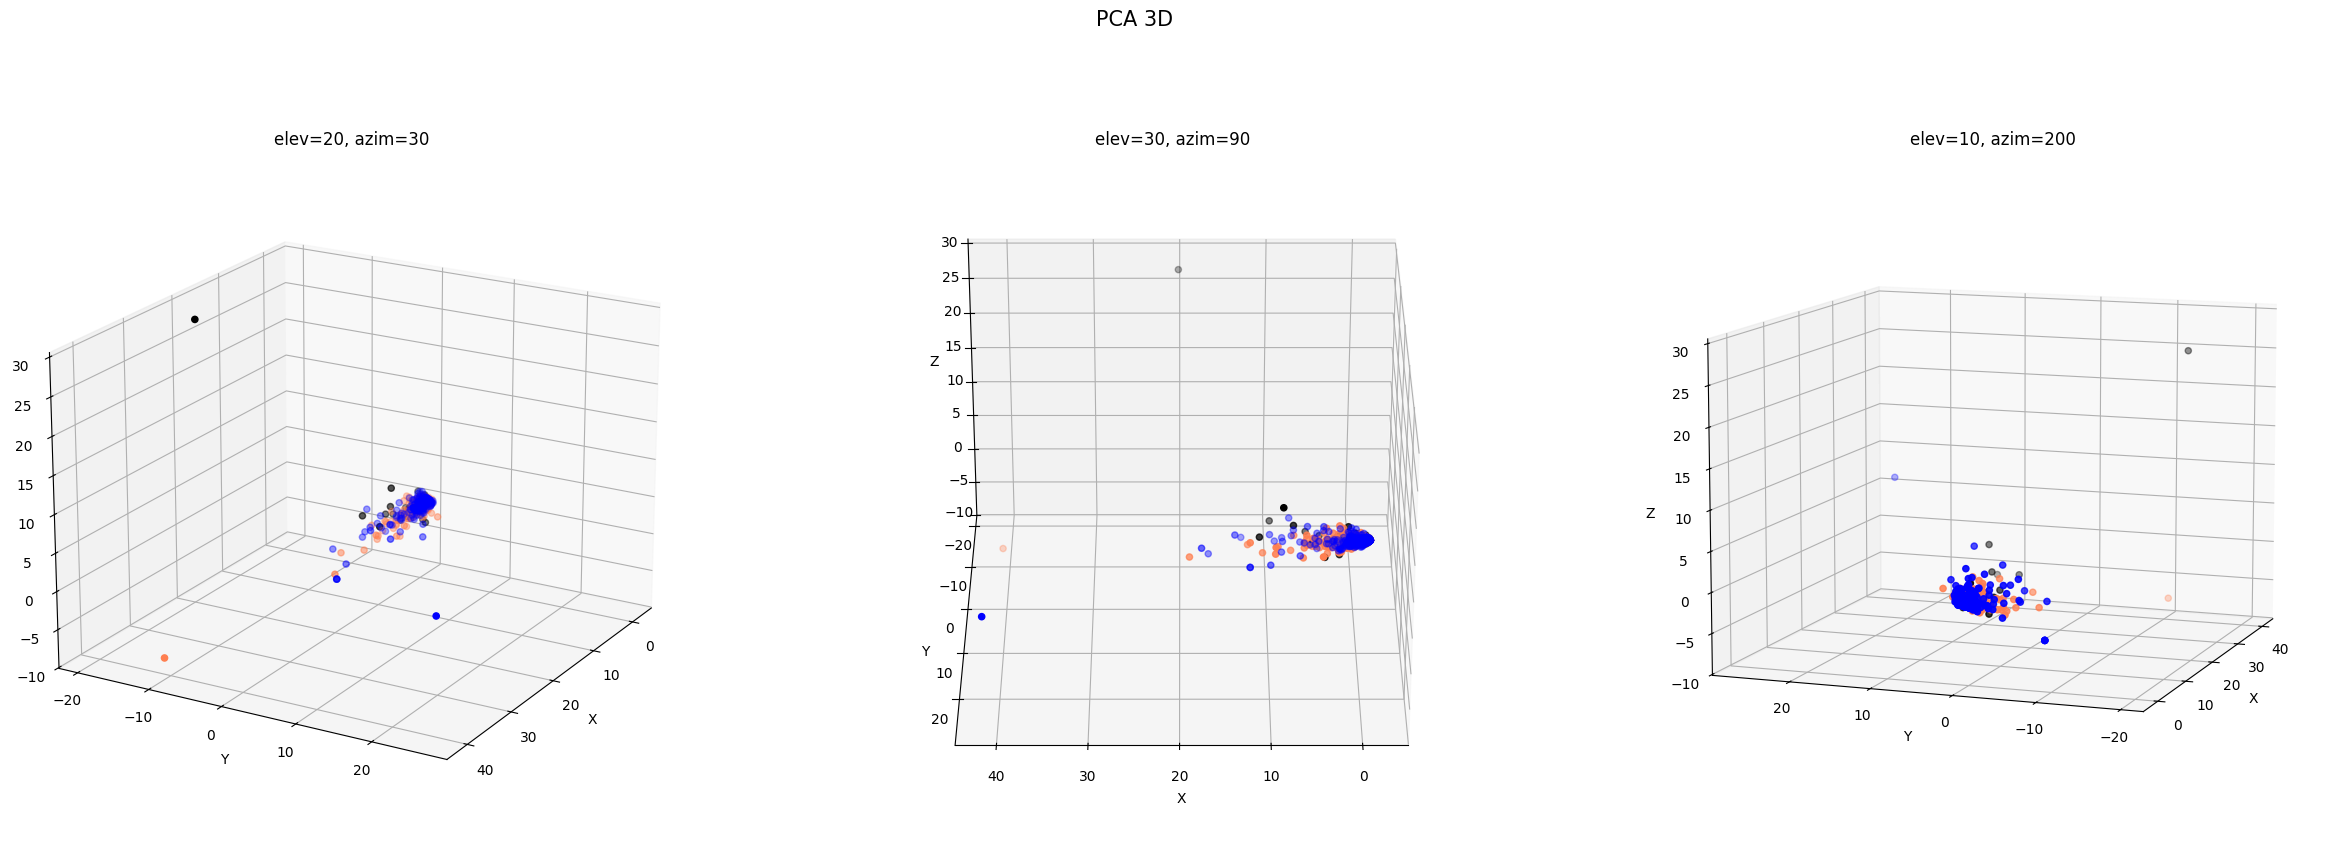

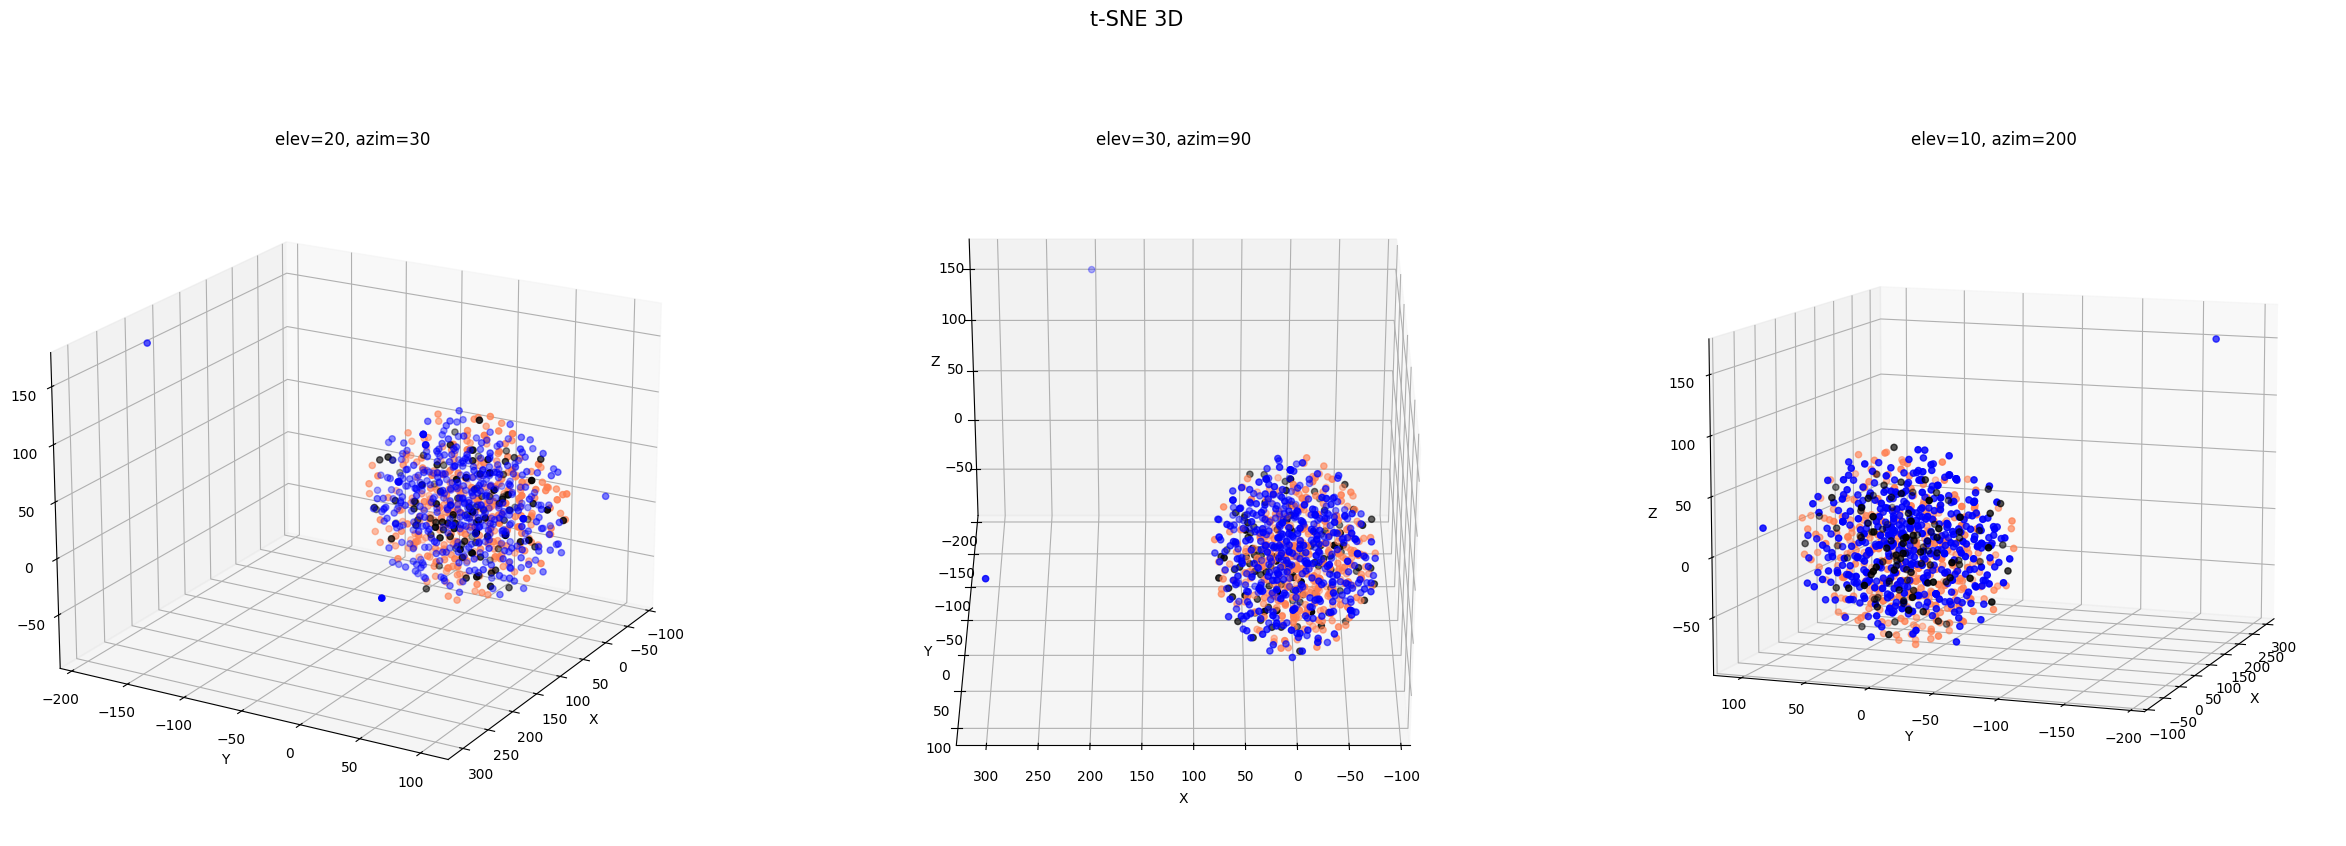

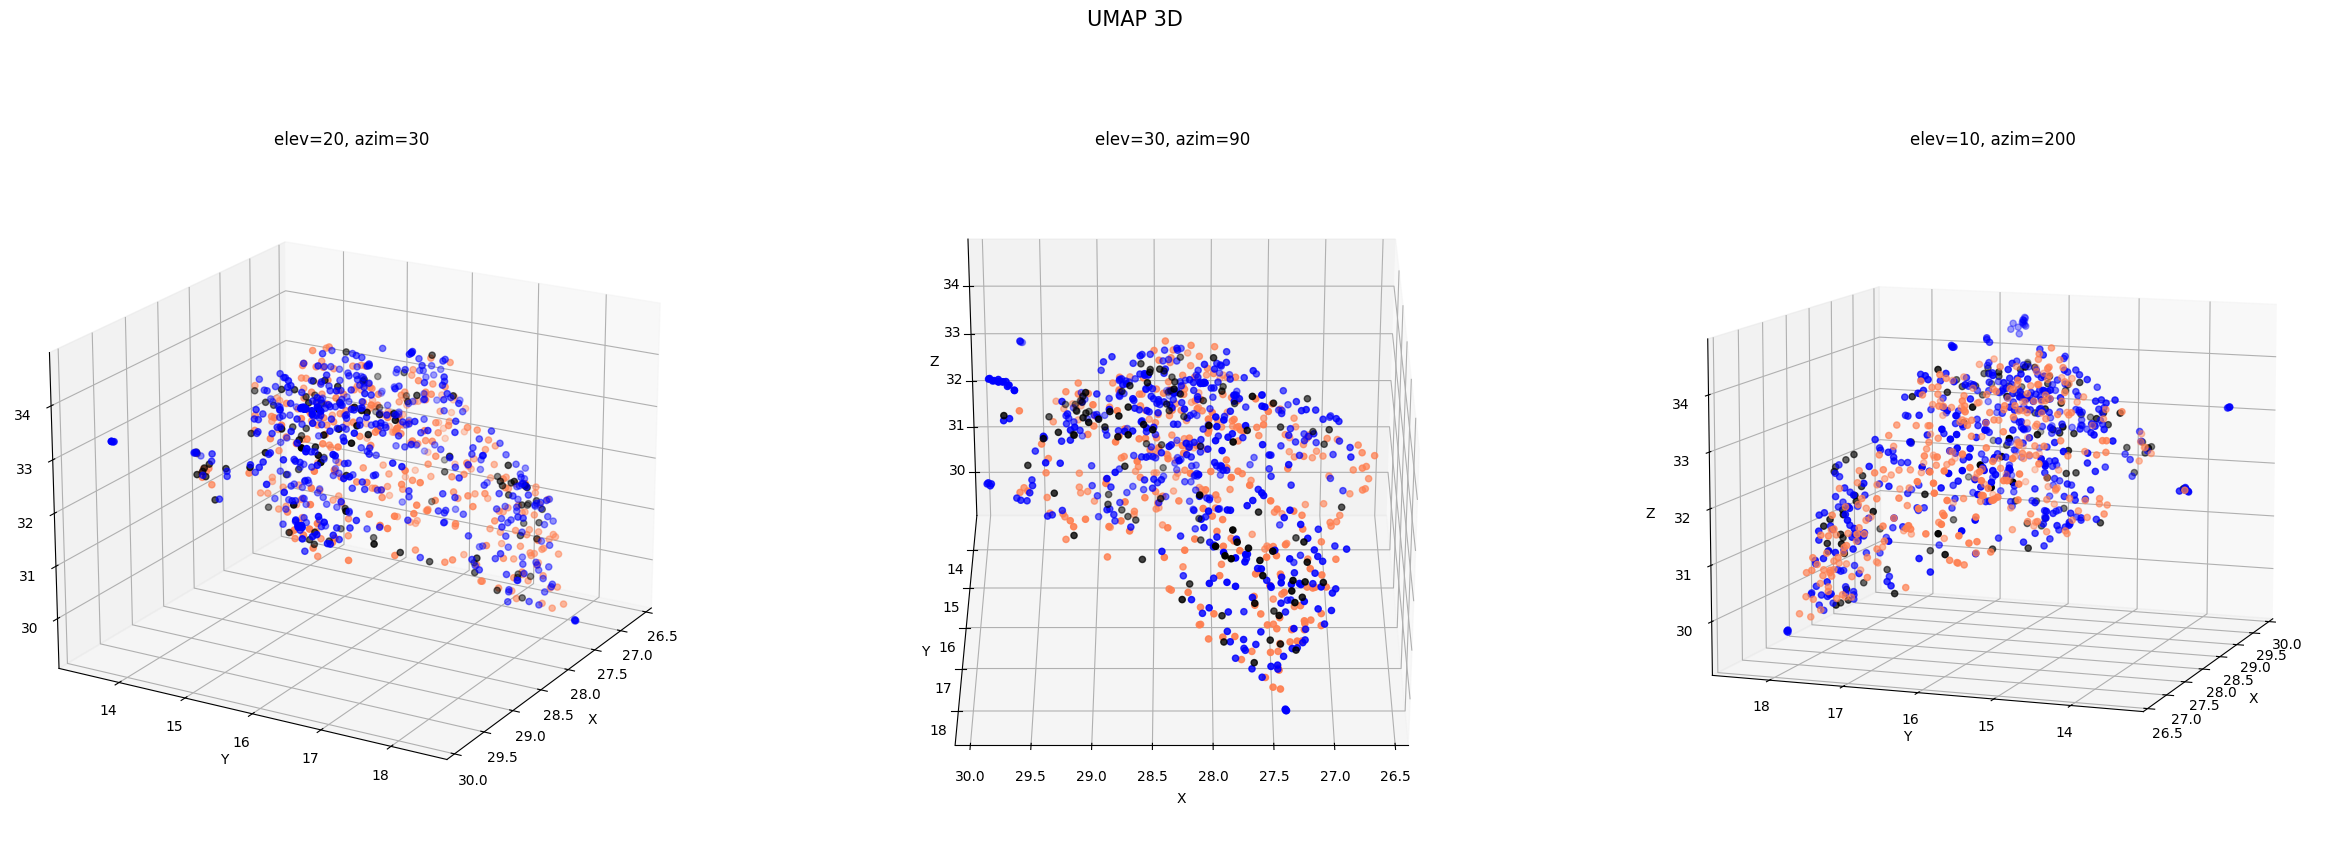

In [ ]:
# Exercise 18

# Answer Here

pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = df["label"].unique()

def plot_3d_scatter(X_red, title):
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(title, fontsize=15)
    
    angles = [(20, 30), (30, 90), (10, 200)]
    for i, (e, a) in enumerate(angles, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        for color, cat in zip(col, categories):
            mask = df["label"] == cat
            ax.scatter(
                X_red[mask, 0], 
                X_red[mask, 1], 
                X_red[mask, 2],
                c=color, 
                label=cat, 
            )
        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.view_init(elev=e, azim=a)
        ax.set_title(f"elev={e}, azim={a}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    plt.show()

# Plot the 3D projections
plot_3d_scatter(pca_3d, 'PCA 3D')
plot_3d_scatter(tsne_3d, 't-SNE 3D')
plot_3d_scatter(umap_3d, 'UMAP 3D')


In [ ]:
# We can see that the 3D plots tend to have a similar behaviour to the 2D ones, but with more depth and perspective. For PCA, in the 2D plot there was no clear way to tell
# if the categories were well separated, but in the 3D plot, as we rotate the view, it seems that the blue and orange categories might be separated, since the blue category is more clustered towards on side.
# However, with t-SNE and UMAP, the 3D plots still show a lot of overlap between the categories, similar to the 2D plots. The extra dimension doesn't seem to help much in separating the categories.

### 5.6 Discretization and Binarization

In [ ]:
# Creating a label_name column

df["label_name"] = df["label"].map({-1.0: "negative", 0.0: "neutral", 1.0: "positive"})
df.head()

In [ ]:
# Creating ONE Hot encoding for label column

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.label)
df["bin_category"] = mlb.transform(df["label"]).tolist()
df[0:9]

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams,bin_category
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,0.0,0.0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]","[1, 0, 0]"
1,comment,2025-04-12 01:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,0.0,1.0,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma...","[0, 1, 0]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,0.0,1.0,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]","[0, 1, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,1.0,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,0.0,1.0,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didnât, say, thank, you, .]","[1, 0, 0]"
5,comment,2025-04-12 02:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,0.0,1.0,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","[0, 1, 0]"
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,5,0.0,1.0,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"[Trump, will, respond, to, china, increasing, ...","[1, 0, 0]"
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,0.0,1.0,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","[0, 1, 0]"
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,0.0,1.0,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","[0, 0, 1]"


In [ ]:
# Exercise 19

mlb_2 = preprocessing.LabelBinarizer()
mlb_2.fit(df.label_name)
df['bin_label_name'] = mlb_2.transform(df['label_name']).tolist()
df[0:9]

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams,bin_category,label_name,bin_label_name
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,0.0,0.0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]","[1, 0, 0]",negative,"[1, 0, 0]"
1,comment,2025-04-12 01:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,0.0,1.0,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma...","[0, 1, 0]",neutral,"[0, 1, 0]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,0.0,1.0,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]","[0, 1, 0]",neutral,"[0, 1, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,1.0,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","[0, 0, 1]",positive,"[0, 0, 1]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,0.0,1.0,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didnât, say, thank, you, .]","[1, 0, 0]",negative,"[1, 0, 0]"
5,comment,2025-04-12 02:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,0.0,1.0,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","[0, 1, 0]",neutral,"[0, 1, 0]"
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,5,0.0,1.0,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"[Trump, will, respond, to, china, increasing, ...","[1, 0, 0]",negative,"[1, 0, 0]"
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,0.0,1.0,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","[0, 1, 0]",neutral,"[0, 1, 0]"
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,0.0,1.0,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","[0, 0, 1]",positive,"[0, 0, 1]"


In [ ]:
# As we can observe, this method does work for numeric data (category) as well as for string data (category_name) and returns the same ONE-HOT encoding representation 
# for both cases.

### 6. Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record

document_to_transform_1 = []
random_record_1 = df.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[111]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trumpâ\x80\x99s kindergarten graduation certificate? Ideally the long form version.']
['What dose the 100.027 mean ?']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.166667
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\arami\AppData\Local\Temp\ipykernel_18404\1933306244.py:52: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\1933306244.py:53: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\1933306244.py:54: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\1933306244.py:56: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [ ]:
# Exercise 20

# The new text references are 60, 600 and 88
document_to_transform_1 = []
random_record_1 = df.iloc[60]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[600]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[88]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print("Let's take a look at the new text references:")
print("1:", document_to_transform_1[0][:300])
print("2:", document_to_transform_2[0][:300])
print("3:", document_to_transform_3[0][:300])

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Let's take a look at the new text references:
1: $IRDM

&#x200B;

[/](/)

at high level its consolidating, 

however currently in uptrend.
2: Bank week is so boring. PUTS on NFLX
3: $FDX - still in downtrend

[/](/)

&#x200B;

$ICE - down

&#x200B;

[/](/)
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.285714
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\arami\AppData\Local\Temp\ipykernel_18404\255811800.py:44: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\255811800.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\255811800.py:46: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\arami\AppData\Local\Temp\ipykernel_18404\255811800.py:48: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

In [ ]:
# As we can observe, the Cosine Similarity values have changed with respect to the previous ones, which is expected since we don't know exactly the categories of each document
# selected. The similarities between the documents and themselves remain 1, as expected. The similarities further away from 1 indicate that the angle between the document vectors
# is larger, meaning that they share less common words.

### 7. Data Classification

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5843137254901961

Classification Report:
               precision    recall  f1-score   support

    negative     0.5820    0.7245    0.6455        98
     neutral     0.6210    0.6364    0.6286       121
    positive     0.1111    0.0278    0.0444        36

    accuracy                         0.5843       255
   macro avg     0.4380    0.4629    0.4395       255
weighted avg     0.5340    0.5843    0.5526       255



In [ ]:
# Exercise 21

#Answer

# Create the new train and test partitions with the augmented data dataframe "augmented_df"
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.6000    0.7347    0.6606        98
     neutral     0.6320    0.6529    0.6423       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4488       255
weighted avg     0.5446    0.5961    0.5648       255



In [ ]:
# Exercise 22

# As we can observe, adding new features derived from the frequent patterns has improved the overall accuracy of the model from 58.43% to 59.61%. However, these metrics are not significantly higher, indicating that while 
# the patterns do provide some useful information, they may not be capturing enough relevant features to make a great difference in classification performance.

In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5411764705882353

Classification Report:
               precision    recall  f1-score   support

    negative     0.5301    0.4490    0.4862        98
     neutral     0.5789    0.7273    0.6447       121
    positive     0.3000    0.1667    0.2143        36

    accuracy                         0.5412       255
   macro avg     0.4697    0.4476    0.4484       255
weighted avg     0.5208    0.5412    0.5230       255



In [ ]:
# Exercise 23

# The MultinomialNB model was designed for text data and performed better than the Decision Tree model when using only the document-term/pattern frequency data. 
# Since MultinomialNB is probability-based, it works well with high-dimensional sparse data and is less likely to suffer from data over-fitting. On the other hand,
# the DecisionTreeClassifier is very sensitive to over-fitting, specially with high-dimensional and sparse data. We also have to take into consideration that the size of the
# dataset is very small, which can also affect the performance of the Decision Tree model negatively. However, none of the two models performed very well, indicating that more advanced models 
# or better feature engineering might be needed to improve classification performance on this dataset.

In [ ]:
# Exercise 24

# Split the data from the augmented dataframe
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM + Augmented Data):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM + Augmented Data): 0.49411764705882355

Classification Report:
               precision    recall  f1-score   support

    negative     0.4932    0.3673    0.4211        98
     neutral     0.5183    0.7025    0.5965       121
    positive     0.2778    0.1389    0.1852        36

    accuracy                         0.4941       255
   macro avg     0.4297    0.4029    0.4009       255
weighted avg     0.4747    0.4941    0.4710       255



In [ ]:
# The performance decreased compared to the previous Decision Tree model using only the document-term frequency data, from 54.12% to 49.41%. This suggests that the additional features derived 
# from frequent patterns can't enhance the DecisionTrees's performance. The increment in features may have introduced noise or irrelevant information that confused the model, leading to overfitting or misclassification.

In [ ]:
# Exercise 25

# Not necessary to answer here, since it's been answered in the Master notebook.

### Additional Work

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [ ]:
# Creating the tf-idf document matrixes for each category

from sklearn.feature_extraction.text import TfidfVectorizer

categories = df['label'].unique()
category_dfs = {}
for category in categories:
    category_dfs[category] = df[df['label'] == category].copy()
def create_tfidf_df(df):
    tfidf_vect = TfidfVectorizer()
    X_counts = tfidf_vect.fit_transform(df['text'])
    words = tfidf_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df
filt_tfidf_dfs = {}
for category in categories:
    filt_tfidf_dfs[category] = create_tfidf_df(category_dfs[category])
    print("TF-IDF Category:", category, "- Shape", filt_tfidf_dfs[category].shape)

TF-IDF Category: -1.0 - Shape (315, 2228)
TF-IDF Category: 0.0 - Shape (423, 2784)
TF-IDF Category: 1.0 - Shape (109, 1186)


In [ ]:
# Filtering the bottom 1% and top 5% words based on their sum across all documents

# Note that this method might not fit correctly the tf-idf values, since they are not frequencies but rather weights. However, for the sake of the exercise, we will proceed with this method.

tf_idfs_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    tf_idfs_dfs[category] = filter_top_bottom_words_by_sum(filt_tfidf_dfs[category])


For category -1.0 we filter the following words:
Bottom 1.0% words: 
1999              0.044626
1974              0.044626
1973              0.044626
1969              0.044626
immensely         0.044626
lives             0.044626
fleecing          0.044626
across            0.044626
gaslighting       0.044626
rallying          0.044626
future            0.044626
representation    0.044626
gerald            0.044626
coup              0.044626
pound             0.044626
positions         0.044626
globe             0.044626
regain            0.044626
become            0.044626
wing              0.044626
scot              0.044626
words             0.044626
dtype: float64
Top 5.0% words: 
most     1.867305
time     1.870827
know     1.881410
feel     1.888173
xi       1.911882
          ...    
it      10.380532
and     12.751770
is      13.704849
to      14.877716
the     21.867863
Length: 111, dtype: float64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
writing  

In [ ]:
# Creating transactional databases for each category and replacing the "-" from "-1.0" with "minus_1_0" to avoid errors in file creation

# Note that I'm setting the condition to be ">= 0.01", since tf-idf values are usually smaller than 1 

for category in tf_idfs_dfs:
    category_safe = str(category).replace('.', '_').replace('-', 'minus_')
    obj = DF2DB(tf_idfs_dfs[category])           
    obj.convert2TransactionalDatabase(f'td_tfidf_db_{category_safe}.csv', '>=', 0.01)

In [ ]:
# Implementing FPGrowth for category 1.0 (positive sentiment)

# Note that I'm adding a lower minSup value 6 to get more patterns for analysis, since this dataset is smaller than the one for the Master notebook.

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_tfidf_db_1_0.csv', minSup=minSup)
obj1.mine()
tfidf_frequentPatternsDF_1_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(tfidf_frequentPatternsDF_1_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', tfidf_frequentPatternsDF_1_0['Support'].min())
print('Max Support:', tfidf_frequentPatternsDF_1_0['Support'].max())
obj1.save('tfidf_freq_patterns_1_0_minSup6.txt')
tfidf_frequentPatternsDF_1_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9
Runtime: 0.009814023971557617
Min Support: 6
Max Support: 9


,Patterns,Support
0,into,6
1,your,6
2,out,6
3,economy,6
4,has,7
5,all,7
6,as,7
7,or,7
8,by,9


In [ ]:
# Implementing FPGrowth for category 0.0 (neutral sentiment)

minSup=6
obj1 = alg.FPGrowth(iFile='td_tfidf_db_0_0.csv', minSup=minSup)
obj1.mine()
tfidf_frequentPatternsDF_0_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(tfidf_frequentPatternsDF_0_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', tfidf_frequentPatternsDF_0_0['Support'].min())
print('Max Support:', tfidf_frequentPatternsDF_0_0['Support'].max())
obj1.save('tfidf_freq_patterns_0_0_minSup6.txt')
tfidf_frequentPatternsDF_0_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 102
Runtime: 0.012203216552734375
Min Support: 6
Max Support: 13


,Patterns,Support
0,big,6
1,deal,6
2,talk,6
3,months,6
4,probably,6
...,...,...
97,look,11
98,since,12
99,also,12
100,because,12


In [ ]:
# Implementing FPGrowth for category -1.0 (negative sentiment)

minSup=6
obj1 = alg.FPGrowth(iFile='td_tfidf_db_minus_1_0.csv', minSup=minSup)
obj1.mine()
tfidf_frequentPatternsDF_minus_1_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(tfidf_frequentPatternsDF_minus_1_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print('Min Support:', tfidf_frequentPatternsDF_minus_1_0['Support'].min())
print('Max Support:', tfidf_frequentPatternsDF_minus_1_0['Support'].max())
obj1.save('tfidf_freq_patterns_minus_1_0_minSup6.txt')
tfidf_frequentPatternsDF_minus_1_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 108
Runtime: 0.01704549789428711
Min Support: 6
Max Support: 14


,Patterns,Support
0,calls,6
1,companies,6
2,lot,6
3,next,6
4,first,6
...,...,...
103,really,11
104,point,12
105,back,12
106,been,12


In [ ]:
# Obtaining the final tfidf dataframe with the patterns that are unique to each category

dfs = [tfidf_frequentPatternsDF_1_0, tfidf_frequentPatternsDF_0_0, tfidf_frequentPatternsDF_minus_1_0]
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(d) for d in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
80     other       13
158     been       12
157    point       12
78      make       11
79     lower       11
..       ...      ...
106     come        6
107    years        6
108     face        6
109       ll        6
110     went        6

[159 rows x 2 columns]
Number of patterns discarded: 60


In [ ]:
# Creating the augmented tfidf term-document matrix with the found patterns

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()
X_tdm = count_vect.fit_transform(df['text'])
terms = count_vect.get_feature_names_out()
df['tokenized_text'] = df['text'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
tfidf_tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)
tfidf_augmented_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)
tfidf_augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,stock,moving,life,puts,both,come,years,face,ll,went
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Now that we have the four matrixes ready to be used for classification (tdm_df, augmented_df, tfidf_tdm_df and tfidf_augmented_df), we can proceed to train and evaluate the models.

In [ ]:
# Classification model MultinomialNB with only term frequency data (tdm_df)

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5843137254901961

Classification Report:
               precision    recall  f1-score   support

    negative     0.5820    0.7245    0.6455        98
     neutral     0.6210    0.6364    0.6286       121
    positive     0.1111    0.0278    0.0444        36

    accuracy                         0.5843       255
   macro avg     0.4380    0.4629    0.4395       255
weighted avg     0.5340    0.5843    0.5526       255



In [ ]:
# Classification model MultinomialNB with augmented term frequency data (augmented_df)

X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.6000    0.7347    0.6606        98
     neutral     0.6320    0.6529    0.6423       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4488       255
weighted avg     0.5446    0.5961    0.5648       255



In [ ]:
# Classification model GaussianNB with only tfidf data (tfidf_tdm_df)

# Note that we use GaussianNB here since MultinomialNB is not suitable for continuous data like tf-idf values, according to the article cited.

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(tfidf_tdm_df, df['label'], test_size=0.3, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4666666666666667

Classification Report:
               precision    recall  f1-score   support

    negative     0.4954    0.5510    0.5217        98
     neutral     0.5478    0.5207    0.5339       121
    positive     0.0645    0.0556    0.0597        36

    accuracy                         0.4667       255
   macro avg     0.3693    0.3757    0.3718       255
weighted avg     0.4595    0.4667    0.4623       255



In [ ]:
# Classification model GaussianNB with augmented tfidf data (tfidf_augmented_df)

X_train, X_test, y_train, y_test = train_test_split(tfidf_augmented_df, df['label'], test_size=0.3, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4823529411764706

Classification Report:
               precision    recall  f1-score   support

    negative     0.5045    0.5714    0.5359        98
     neutral     0.5652    0.5372    0.5508       121
    positive     0.0690    0.0556    0.0615        36

    accuracy                         0.4824       255
   macro avg     0.3796    0.3881    0.3828       255
weighted avg     0.4718    0.4824    0.4760       255



In [ ]:
# Now that we have the four results comparing TF and TF-IDF with and without augmented data, we can say that none of the models performed with high levels of accuracy.
# The best performance was achieved by the MultinomialNB model with augmented data (59.61% accuracy). This suggests that adding frequent pattern features can help improve classification performance,
# but the choice of representation (TF vs TF-IDF) and model type (MultinomialNB vs GaussianNB) also play important roles. In my opinion, further experimentation would need better feature preprocessing, which might
# lead to improved results.

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

In [ ]:
# Most of the inefficiencies are due to the preprocessing steps. Eliminating the Top 5% and Bottom 1% words based on their sums might not be the best approach, especially for tf-idf values.
# Additionally, the method of creating transactional databases based on a threshold (>= 0.01 or >= 1) might not capture the most relevant patterns. More sophisticated feature selection or dimensionality reduction 
# techniques could be explored to enhance the quality of the input data for pattern mining and classification. For example, I would have tried using NLTK library to eliminate stopwords and do stemming or lemmatization 
# before creating the term-document matrixes. Pattern extraction could also be improved by experimenting with different minimum support thresholds or using other pattern mining algorithms. I would say this last part
# is one of those that bring the most value, but also the most complexity to the overall process and this complexity needs to be assessed accordingly. Moreover, we barely used
# data decomposition techniques like PCA, t-SNE or UMAP for feature reduction before classification, which could potentially improve model performance and reduce overfitting.